In [78]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [79]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [80]:
len(X_train)

60000

In [81]:
len(X_test)

10000

In [82]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [83]:
len(X_train[9][0])

28

In [84]:
X_train[0].shape

(28, 28)

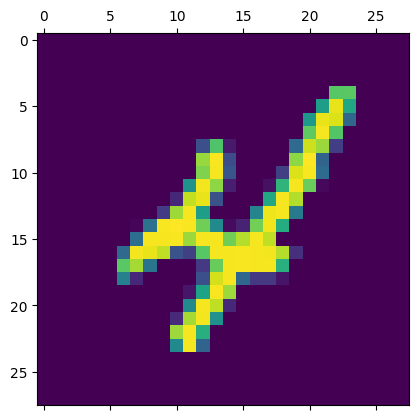

In [85]:
plt.matshow(X_train[9])

In [86]:
y_train[9]

4

In [87]:
X_train.shape

(60000, 28, 28)

In [92]:
X_train = X_train / 255
X_test = X_test / 255

In [93]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [94]:
X_train_flattened.shape

(60000, 784)

In [95]:
X_test_flattened.shape

(10000, 784)

In [96]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [97]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 787us/step - loss: 0.4679 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 1s 747us/step - loss: 0.3044 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 1s 773us/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 1s 744us/step - loss: 0.2736 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 1s 723us/step - loss: 0.2666 - accuracy: 0.9260


In [98]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 756us/step - loss: 0.2659 - accuracy: 0.9272


[0.26594966650009155, 0.9272000193595886]

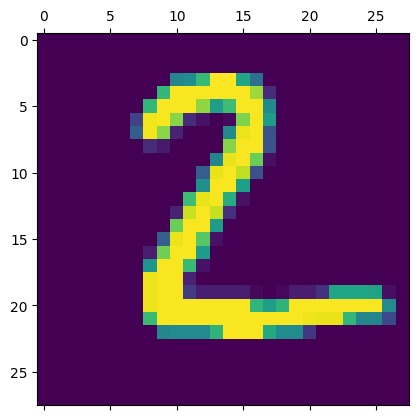

In [103]:
plt.matshow(X_test[1])

In [106]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 0s 627us/step


array([4.3058050e-01, 1.4768462e-02, 9.9955547e-01, 3.3894092e-01,
       8.7419344e-10, 8.6127490e-01, 8.9606249e-01, 6.8421137e-13,
       2.0646439e-01, 2.0662512e-09], dtype=float32)

In [107]:
np.argmax(y_predicted[1])

2

In [108]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [109]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [110]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    1,    0,    6,    6,    3,    2,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   4,   11,  930,   12,    9,    3,   11,   10,   39,    3],
       [   3,    0,   24,  903,    1,   31,    3,   13,   27,    5],
       [   1,    1,    5,    1,  928,    0,   10,    4,   11,   21],
       [   7,    3,    3,   20,   11,  792,   15,    5,   31,    5],
       [  11,    3,    7,    1,    8,   12,  909,    2,    5,    0],
       [   1,    5,   23,    4,    8,    0,    0,  958,    3,   26],
       [   7,   11,    5,   16,    9,   22,    9,   11,  879,    5],
       [  10,    7,    1,    7,   38,    9,    0,   27,   10,  900]])>

Text(95.72222222222221, 0.5, 'Truth')

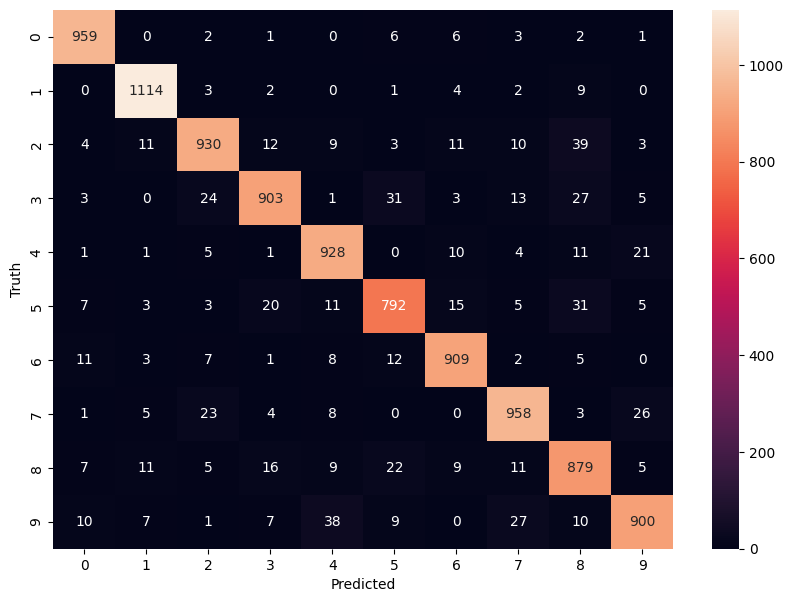

In [112]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [114]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2701 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 2s 993us/step - loss: 0.1251 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 2s 973us/step - loss: 0.0874 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0674 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0535 - accuracy: 0.9840


In [115]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0825 - accuracy: 0.9767


[0.0824989527463913, 0.9767000079154968]

313/313 [==============================] - 0s 754us/step


Text(95.72222222222221, 0.5, 'Truth')

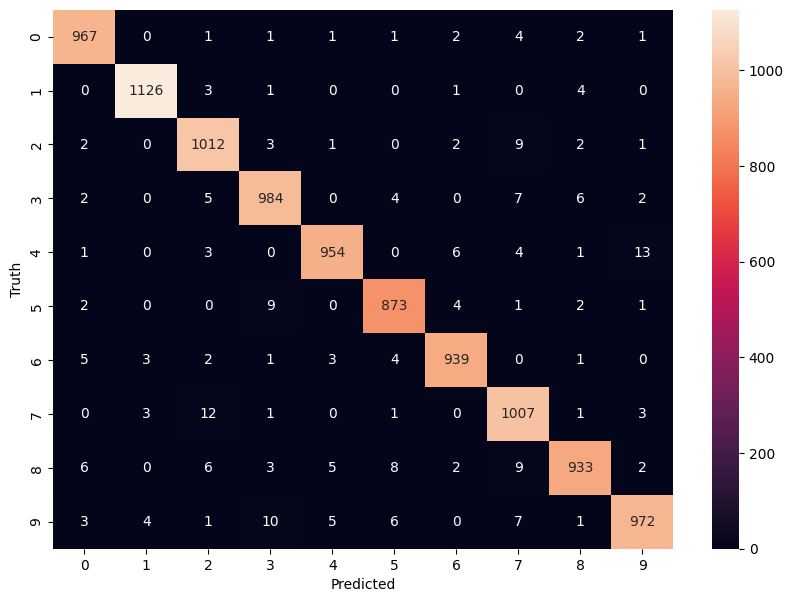

In [119]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [143]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='tanh'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3899 - accuracy: 0.9094
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1311 - accuracy: 0.9646
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0893 - accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0689 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0554 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0459 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0397 - accuracy: 0.9884
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0319 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0301 - accuracy: 0.9909
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.026

In [144]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 962us/step - loss: 0.0914 - accuracy: 0.9761


[0.09143578261137009, 0.9761000275611877]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

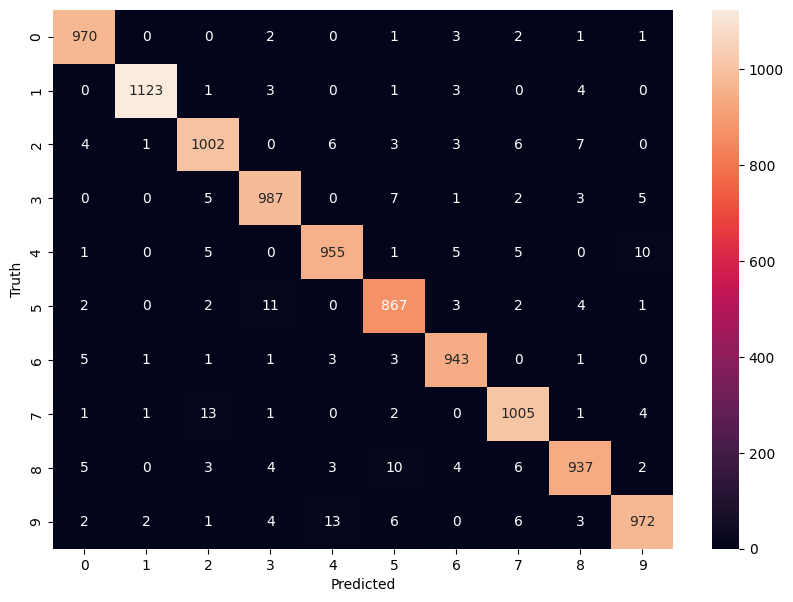

In [145]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Matrix exercise

In [168]:
revenue = np.array([[200,220,250], [68,79,105],[80,85,90]])

In [169]:
revenue

array([[200, 220, 250],
       [ 68,  79, 105],
       [ 80,  85,  90]])

In [173]:
us_dollar = np.array([[75,0,0],[0,75,0],[0,0,75]])

In [174]:
us_dollar

array([[75,  0,  0],
       [ 0, 75,  0],
       [ 0,  0, 75]])

In [175]:
np.dot(revenue, us_dollar)

array([[15000, 16500, 18750],
       [ 5100,  5925,  7875],
       [ 6000,  6375,  6750]])

In [178]:
units_sold = np.array([[50,60,25],[10,13,5],[40,70,52]])
units_sold

array([[50, 60, 25],
       [10, 13,  5],
       [40, 70, 52]])

In [183]:
p_per_unit = np.array([20,30,15])
p_per_unit

array([20, 30, 15])

In [185]:
np.dot(p_per_unit, units_sold)

array([1900, 2640, 1430])

# Mean squared error

In [194]:
y_true = np.array([0.30,0.7,1,0,0.5])
y_pred = np.array([1,1,0,0,1])

In [218]:
def mse(y_true, y_pred):
    total_error = 0
    total_error_mse = 0
    for yt, yp in zip(y_true,y_pred):
        total_error += abs(yt - yp)
        total_error_mse += abs(pow((yt - yp),2))
    print("total error:", total_error)
    print("total error mse:", total_error_mse)
    
    mae = total_error / len(y_pred)
    print("mean absolute error", mae)
    
    mse = total_error_mse/ len(y_pred)
    print("mean squared error", mse)

    return total_error

In [219]:
mse(y_true, y_pred)

total error: 2.5
total error mse: 1.83
mean absolute error 0.5
mean squared error 0.366


2.5

In [224]:
np.sum(np.abs(pow((y_true - y_pred),2)))

1.83

In [225]:
np.mean(np.abs(pow((y_true - y_pred),2)))

0.366

In [226]:
np.mean(np.square(y_true-y_pred))

0.366